<a href="https://colab.research.google.com/github/saharshsb/object-recognition/blob/master/Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle into Colab environment:

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#configuring the path of the .json file
!mkdir p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#dataset api
!kaggle competitions download -c cifar-10

 98% 701M/715M [00:04<00:00, 152MB/s]
100% 715M/715M [00:05<00:00, 150MB/s]


In [ ]:
#extracting the .zip file
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Install py7zr to extract .7z files:

In [ ]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.0/379.0 KB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 KB 6.2 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
#display all files till now
!ls

cifar-10.zip  p		   sampleSubmission.csv  train	   trainLabels.csv
kaggle.json   sample_data  test.7z		 train.7z


Importing all the required dependencies:

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')
len(filenames)

50000

In [ ]:
#printing some of the data
print(filenames[0:5])

['21.png', '17609.png', '423.png', '17775.png', '22484.png']


Processing the labels:

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9 }

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
#check if the encoding is done correctly
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


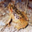

In [ ]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [ ]:
id_list = list(labels_df['id'])

Image processing:

In [ ]:
#convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
#checking datatype
type(data[0])

numpy.ndarray

In [ ]:
#checking shape
data[0].shape

(32, 32, 3)

Here, it is a 32 x 32 image with a 3 channel colour.

In [ ]:
#convert images list and labels list to numpy arrays
x = np.array(data)
y = np.array(labels)

Train - test splitting:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

Building the neural network:

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

#setting up layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#training the neural network
model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 8s 3ms/step - loss: 1.9707 - acc: 0.2850 - val_loss: 1.8272 - val_acc: 0.3377
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8359 - acc: 0.3396 - val_loss: 1.7946 - val_acc: 0.3523
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7988 - acc: 0.3581 - val_loss: 1.8052 - val_acc: 0.3602
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7799 - acc: 0.3643 - val_loss: 1.7549 - val_acc: 0.3683
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7618 - acc: 0.3702 - val_loss: 1.7407 - val_acc: 0.3742
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7500 - acc: 0.3745 - val_loss: 1.7311 - val_acc: 0.3762
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7420 - acc: 0.3803 - val_loss: 1.7338 - val_acc: 0.3720
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

Since the accuracy is low (due to lesser resources), we use ResNet50:

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 509s 420ms/step - loss: 1.0693 - acc: 0.6588 - val_loss: 0.5357 - val_acc: 0.8310
Epoch 2/10
1125/1125 [==============================] - 475s 423ms/step - loss: 0.4952 - acc: 0.8654 - val_loss: 0.2933 - val_acc: 0.9145
Epoch 3/10
1125/1125 [==============================] - 476s 423ms/step - loss: 0.3130 - acc: 0.9288 - val_loss: 0.2454 - val_acc: 0.9320
Epoch 4/10
1125/1125 [==============================] - 475s 422ms/step - loss: 0.2114 - acc: 0.9605 - val_loss: 0.2230 - val_acc: 0.9348
Epoch 5/10
1125/1125 [==============================] - 475s 422ms/step - loss: 0.1488 - acc: 0.9759 - val_loss: 0.2398 - val_acc: 0.9300
Epoch 6/10
1125/1125 [==============================] - 469s 417ms/step - loss: 0.1122 - acc: 0.9847 - val_loss: 0.2158 - val_acc: 0.9380
Epoch 7/10
1125/1125 [==============================] - 469s 417ms/step - loss: 0.0896 - acc: 0.9887 - val_loss: 0.2101 - val_acc: 0.9383
Epoch 8/10
1125/1125 [============

In [ ]:
#evaluating loss and acccuracy
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Accuracy of model: ', accuracy)

313/313 [==============================] - 60s 188ms/step - loss: 2.9787 - acc: 0.0981
Accuracy of model:  0.09809999912977219


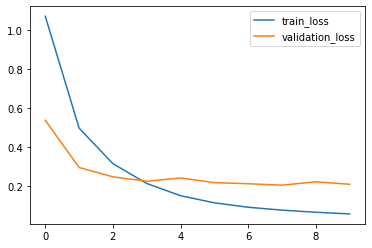

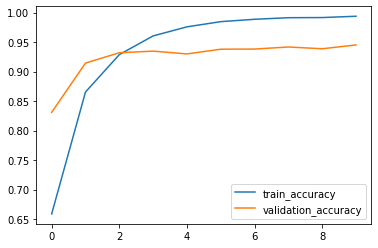

In [ ]:
h = history

#plotting loss value
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

#plotting accuracy value
plt.plot(h.history['acc'], label='train_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()